In [1]:
!git clone https://github.com/FernandaSzAdr/face_detection_projects.git

fatal: destination path 'face_detection_projects' already exists and is not an empty directory.


In [64]:
!git pull origin master

remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 5 (delta 3), reused 5 (delta 3), pack-reused 0
Unpacking objects: 100% (5/5), done.
From https://github.com/FernandaSzAdr/face_detection_projects
 * branch            master     -> FETCH_HEAD
   539c6e6..25e5eaa  master     -> origin/master
Updating 539c6e6..25e5eaa
Fast-forward
 face_detection_tdc_recife/persons/pessoas_02.jpg | Bin 0 -> 80958 bytes
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 face_detection_tdc_recife/persons/pessoas_02.jpg


In [2]:
cd face_detection_projects/face_detection_tdc_recife/

/content/face_detection_projects/face_detection_tdc_recife


# Imports

In [0]:
import cv2
import dlib
from imutils import face_utils
import numpy as np

from google.colab.patches import cv2_imshow

# Códigos!!!


## Dlib detecção de rosto

Preparativos...


In [0]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('helpers/'
                                  'shape_predictor_68_face_landmarks.dat')

In [0]:
def face_detection(frame):
  global detector
    
  rects = detector(frame, 1)

  if len(rects) > 0:
    cv2.putText(frame, "Rostos detectados {}".format(len(rects)), (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    for rect in rects:
      (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
      cv2.rectangle(frame, (bX, bY), (bX + bW, bY + bH),
                    (0, 255, 0), 2)

  return frame
  

In [0]:
def draw_line(frame, points):
  for index, item in enumerate(points): 
      if index == len(points) -1:
          break
      cv2.line(frame, item, points[index + 1], [0, 255, 0], 2) 
  
  return frame

In [0]:
def landmarks_draw(image):
  global detector
  global predictor

  frame = image.copy()

  rects = detector(frame, 1)

  if len(rects) > 0:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
       
    for rect in rects:
      points = []
  
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
  
      for (i, (x, y)) in enumerate(shape):
        if i < 17:
          points.append((x, y))
      
      frame = draw_line(frame, points)
  
  return frame

In [0]:
def landmarks_detection(image):
  global detector
  global predictor

  frame = image.copy()

  rects = detector(frame, 1)

  if len(rects) > 0:
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    cv2.putText(frame, "Rostos detectados {}".format(len(rects)), (10, 20),
                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    for rect in rects:
      shape = predictor(gray, rect)
      shape = face_utils.shape_to_np(shape)
  
      for (i, (x, y)) in enumerate(shape):
        cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
        cv2.putText(frame, str(i + 1), (x - 10, y - 10),
          cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)

  return frame

## Começando as doideiras

(1200, 1200, 3)


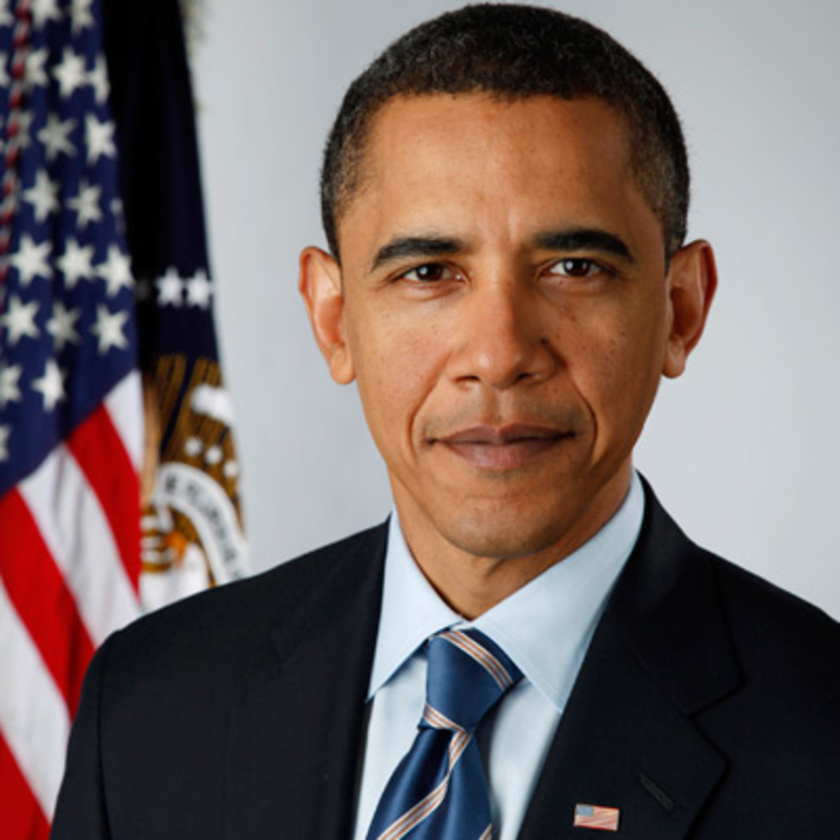

In [51]:
image = cv2.imread('persons/barack_obama.jpg')

print(image.shape)
image = cv2.resize(image, None, fx=0.7, fy=0.7)
  
cv2_imshow(image)

### Captura o rosto

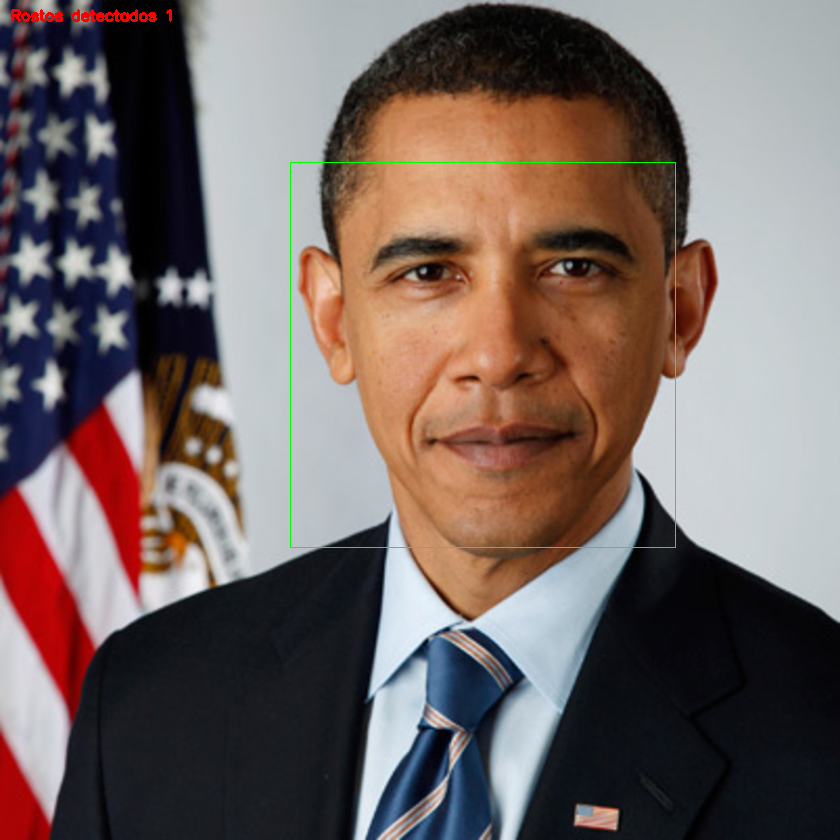

In [30]:
cv2_imshow(face_detection(image))

### E se tiver mais de um rosto?

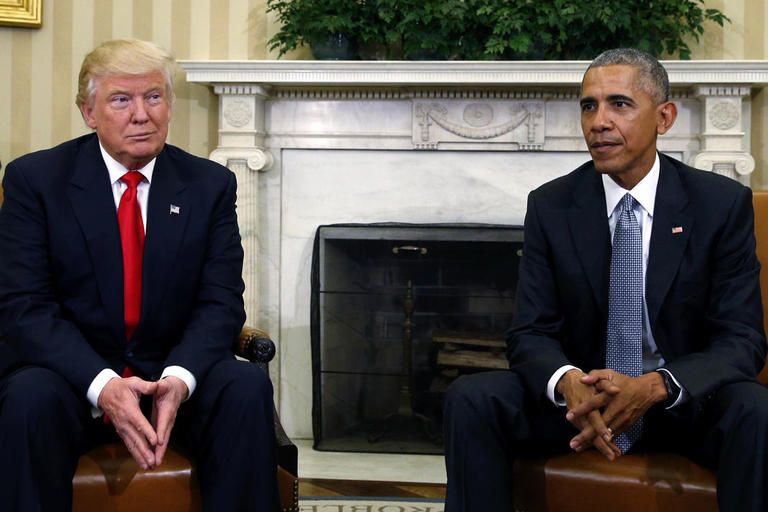

In [74]:
image = cv2.imread('persons/pessoas_02.jpg')

# print(image.shape)
# image = cv2.resize(image, None, fx=1.5, fy=1.5)
  
cv2_imshow(image)

### Será que ele detecta mesmo todos os rostos?


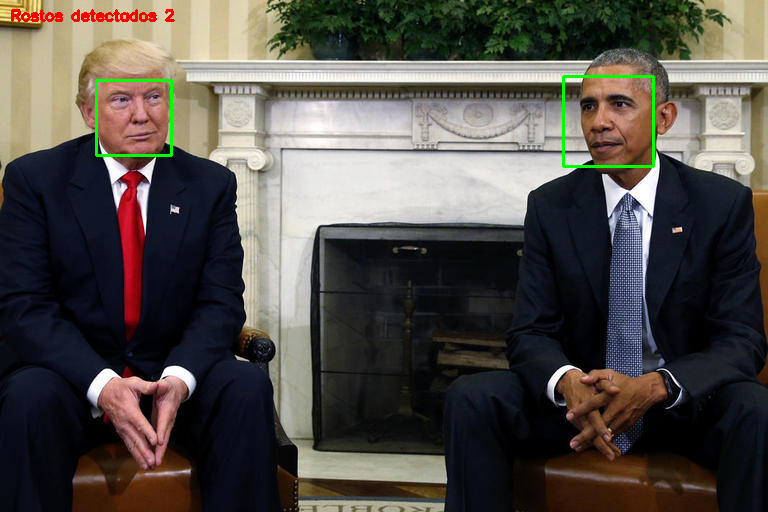

In [75]:
cv2_imshow(face_detection(image))

## Pontos de interesse do rosto

![alt text](https://www.pyimagesearch.com/wp-content/uploads/2017/04/facial_landmarks_68markup-768x619.jpg)

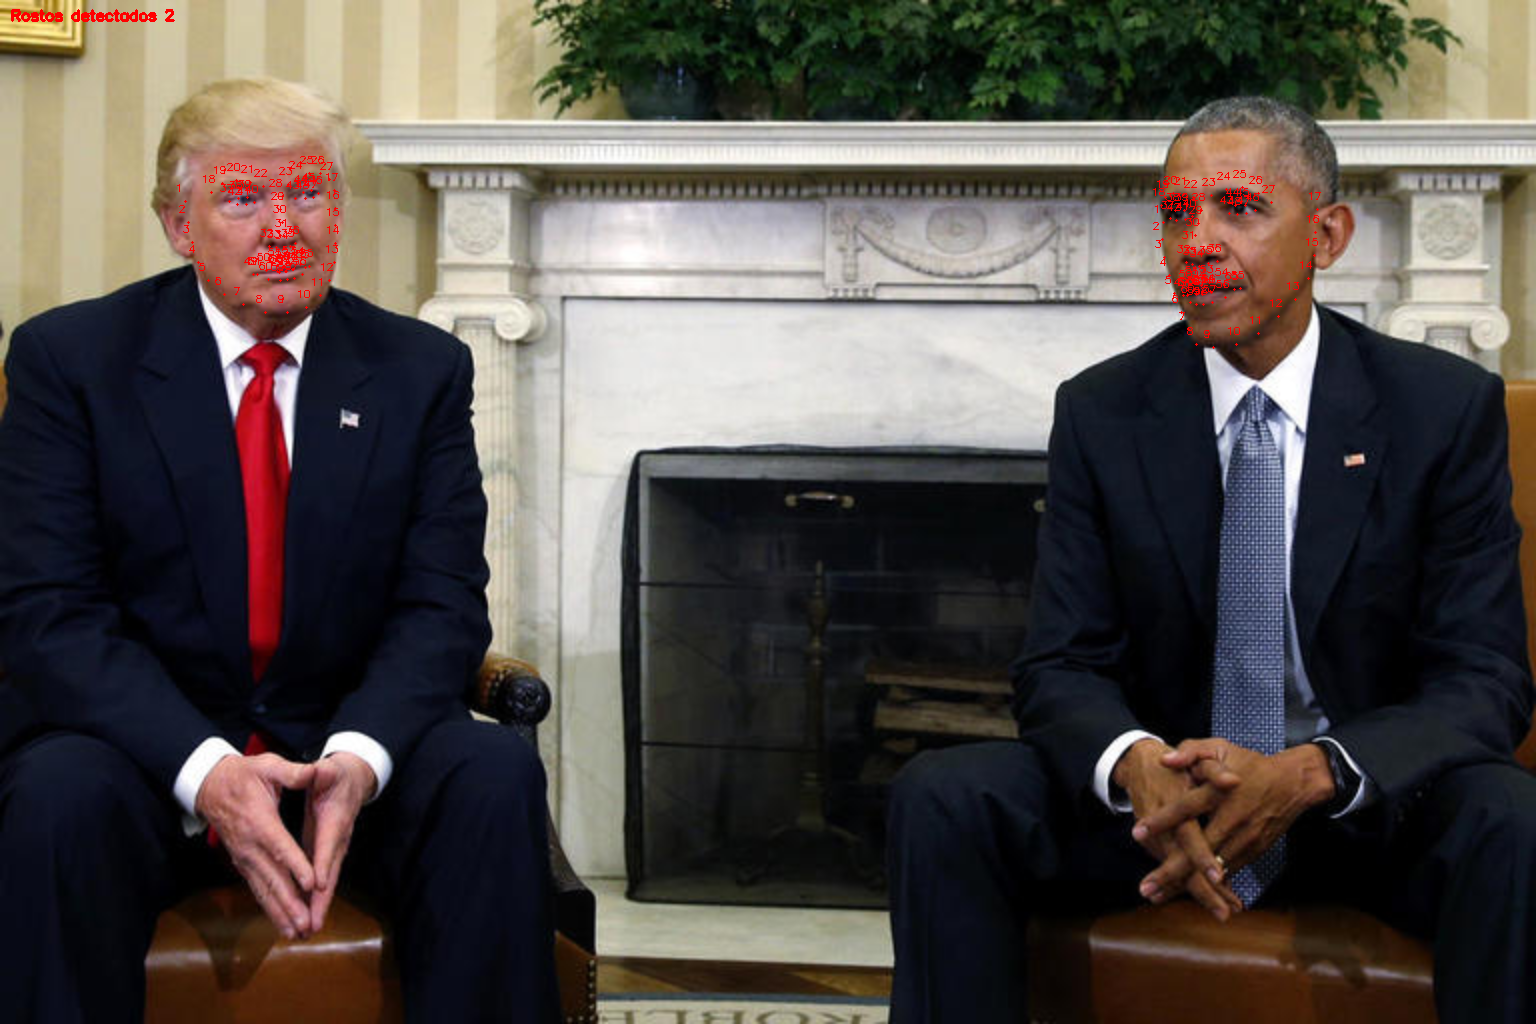

In [112]:
image = cv2.imread('persons/pessoas_02.jpg')

# print(image.shape)
image = cv2.resize(image, None, fx=2, fy=2)

cv2_imshow(landmarks_detection(image))

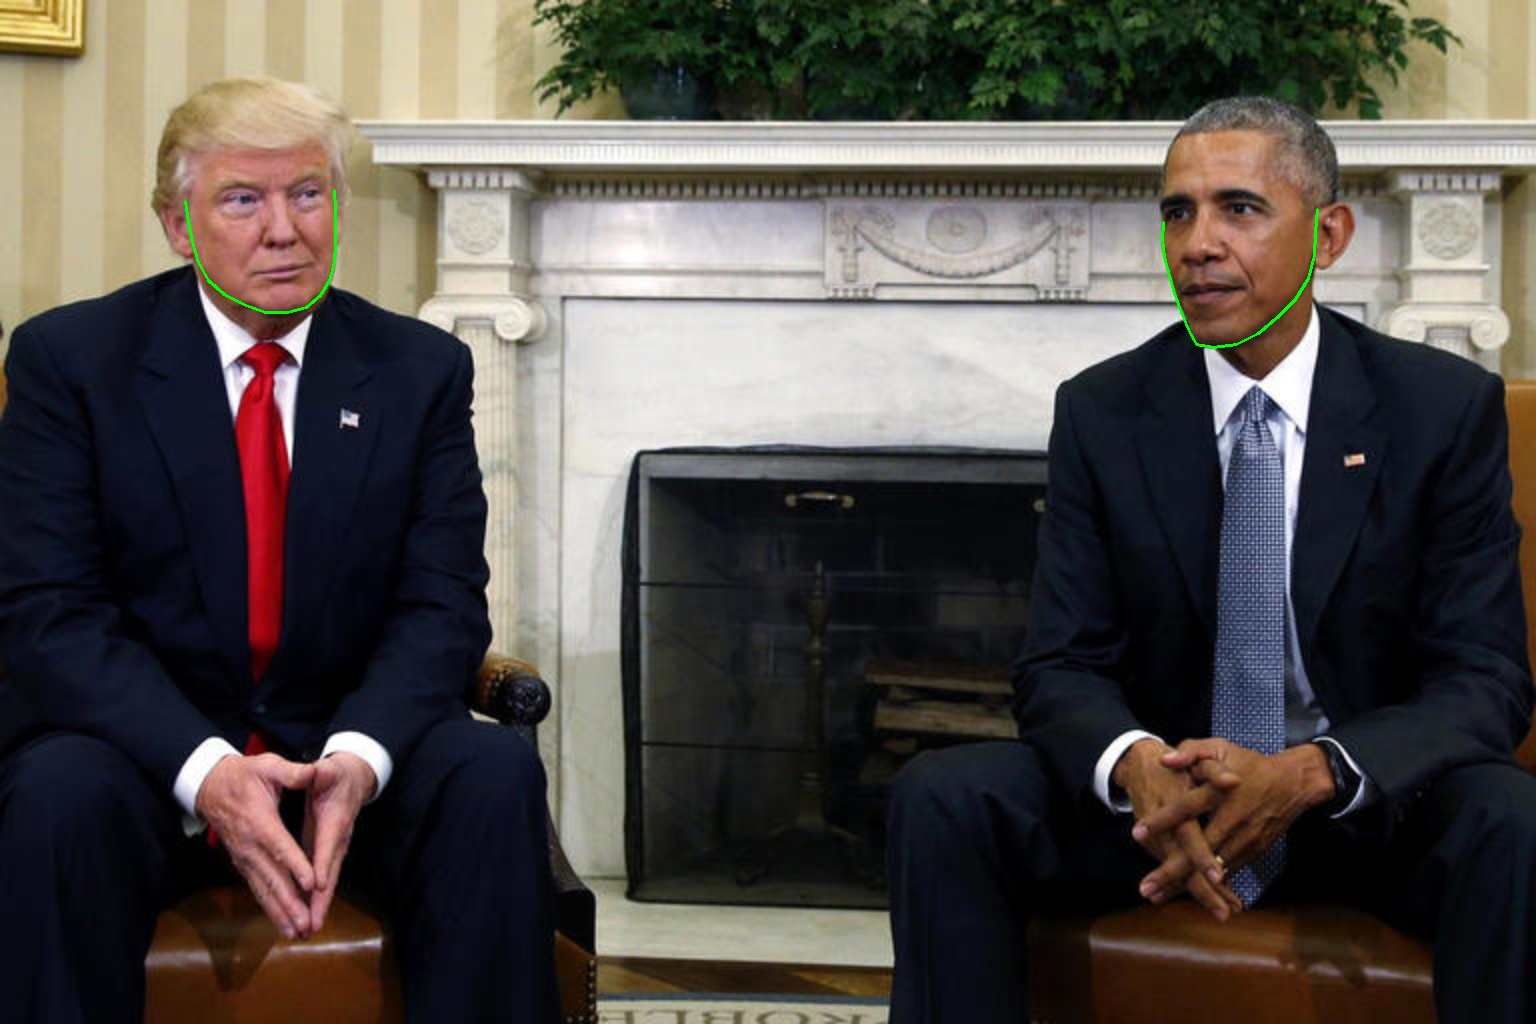

In [115]:
cv2_imshow(landmarks_draw(image))